# Data Analysis on the Spotify dataset
## Analysing the data to find patterns in the features provided and to understand the dataset better.

First we import all the libraries necessary for the overall description.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we import the actual data.

In [61]:
sf_data = pd.read_csv('spotify_data.csv')
sf_data.head()
og_data = pd.read_csv('spotify_data.csv')

In [28]:
sf_data.shape

(169909, 19)

In [29]:
sf_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


Making sure to watch out for the popularity feature which I can later normalize and use as a classification feature for my prediction model.

In [30]:
sort_sf = sf_data.sort_values(by='popularity', ascending=False)
sort_sf.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


In [31]:
sf_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


In [35]:
most_popular = sf_data[sf_data['popularity'] > 90].sort_values(by='popularity', ascending=False)
most_popular.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


In [36]:
sf_data[['artists']].iloc[most_popular.index]

,artists
87942,['The Weeknd']
87940,"['DaBaby', 'Roddy Ricch']"
87949,"['Powfu', 'beabadoobee']"
87941,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']"
87852,"['Surf Mesa', 'Emilee']"
87840,['Roddy Ricch']
87946,['Drake']
87844,"['BENEE', 'Gus Dapperton']"
87951,['6ix9ine']
87858,['Tones And I']


In [38]:
sf_data["duration"]=sf_data["duration_ms"].apply(lambda x: round(x/1000))
sf_data.drop("duration_ms", inplace=True, axis=1)

In [39]:
sf_data.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration
0,0.995,['Carl Woitschach'],0.708,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,159
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,282
2,0.604,['Seweryn Goszczyński'],0.749,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,104
3,0.995,['Francisco Canaro'],0.781,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,181
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,688


In [40]:
sf_data['artists'].value_counts()

['Эрнест Хемингуэй']                                  1215
['Francisco Canaro']                                   938
['Эрих Мария Ремарк']                                  781
['Ignacio Corsini']                                    620
['Frank Sinatra']                                      592
                                                      ... 
['Don Omar', 'Zion & Lennox']                            1
['Sia', 'Alan Walker']                                   1
['Excision', 'Space Laces']                              1
['A$AP Mob', 'A$AP Rocky', 'A$AP Twelvyy', 'KEY!']       1
['Cash Cash', 'Andy Grammer']                            1
Name: artists, Length: 33375, dtype: int64

In [41]:
sf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   energy            169909 non-null  float64
 4   explicit          169909 non-null  int64  
 5   id                169909 non-null  object 
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           16

[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'instrumentalness'),
 Text(4.5, 0, 'liveness'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'popularity'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'year'),
 Text(11.5, 0, 'duration')]

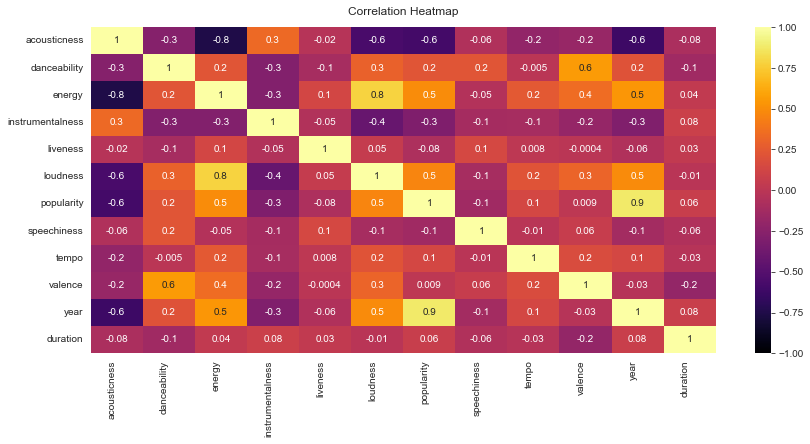

In [42]:
corr_df = sf_data.drop(['key', 'mode', 'explicit'], axis=1).corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, horizontalalignment='right')

In [44]:
sample_df=sf_data.sample(int(0.004*len(sf_data)))
sample_df.head()
print(sample_df.shape)

(679, 19)


[Text(0.5, 1.0, 'Loudness vs Energy')]

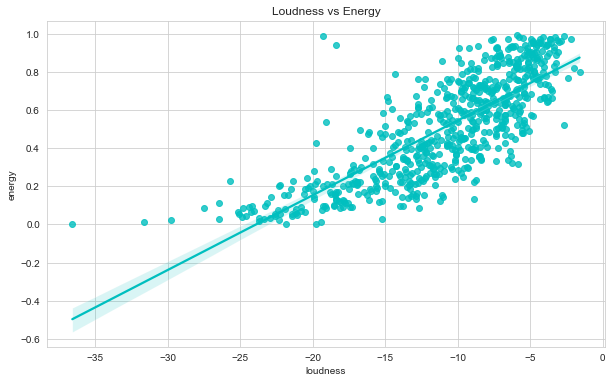

In [45]:
plt.figure(figsize=(10,6))
#regression plot between loudness and energy
sns.regplot(x=sample_df['loudness'], y=sample_df['energy'], color='c').set(title='Loudness vs Energy')

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

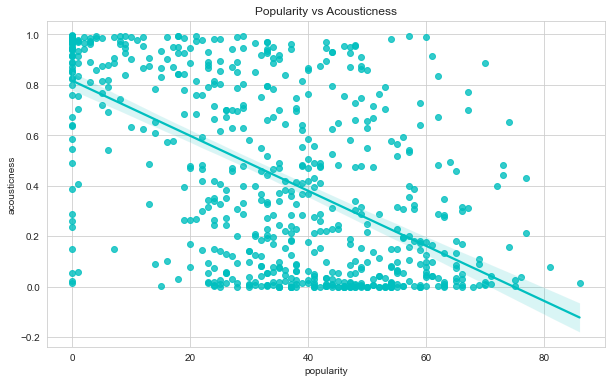

In [46]:
plt.figure(figsize=(10,6))
#regression plot between popularity and acousticness
sns.regplot(x=sample_df['popularity'], y=sample_df['acousticness'], color='c').set(title='Popularity vs Acousticness')

[Text(0.5, 1.0, 'Acousticness vs Danceability')]

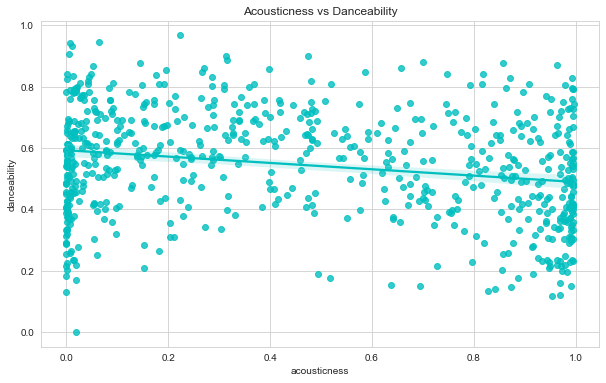

In [47]:
plt.figure(figsize=(10,6))
#regression plot between acousticness and danceability
sns.regplot(x=sample_df['acousticness'], y=sample_df['danceability'], color='c').set(title='Acousticness vs Danceability')

In [52]:
sf_data["release_date"]=pd.to_datetime(sf_data["release_date"])
sf_data["year"]=sf_data["release_date"].dt.year

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

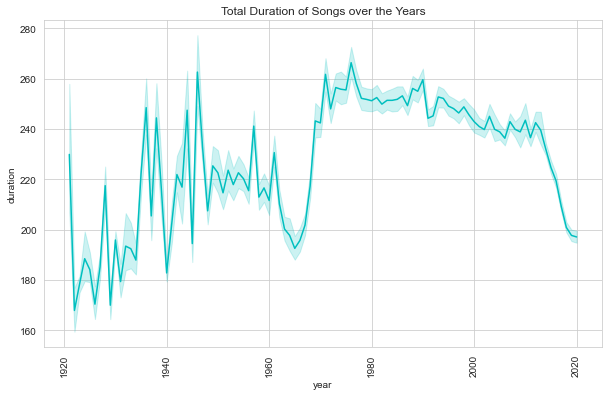

In [53]:
total_duration = sf_data.duration
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
fig=sns.lineplot(x=sf_data.year, y=total_duration, color='c').set(title='Total Duration of Songs over the Years')
plt.xticks(rotation=90)

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

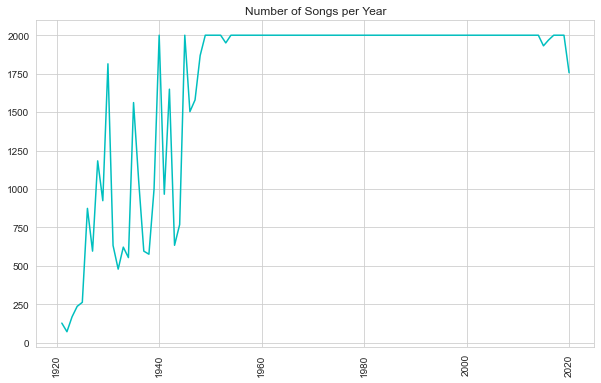

In [63]:
#number of songs per year 
year_count = sf_data.year.value_counts()
year_count = year_count.sort_index()
year_count
#plot
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
fig=sns.lineplot(x=year_count.index, y=year_count.values, color='c').set(title='Number of Songs per Year')
plt.xticks(rotation=90)
